# Lecture 10: Support Vector Machines

- [1 Maximal Margin Classifier](#Maximal-Margin-Classifier)
    - [1.1 Seperating Hyperplane](#Seperating-Hyperplane)
    - [1.2 Non-Seperable Case](#Non-Seperable-Case)
    - [1.3 Lagrange Multiplier](#Lagrange-Multiplier)
    - [1.4 SVM in Python](#SVM-in-Python)


- [2. Kernel Machines](#Kernel-Machines)

## Maximal Margin Classifier

The key idea is to find the optimal hyperplane with maximal margin for separating data, where the margin is defined by the minimal perpendicular distance from the training observations to the seperating hyperplane.

### SVM in Python

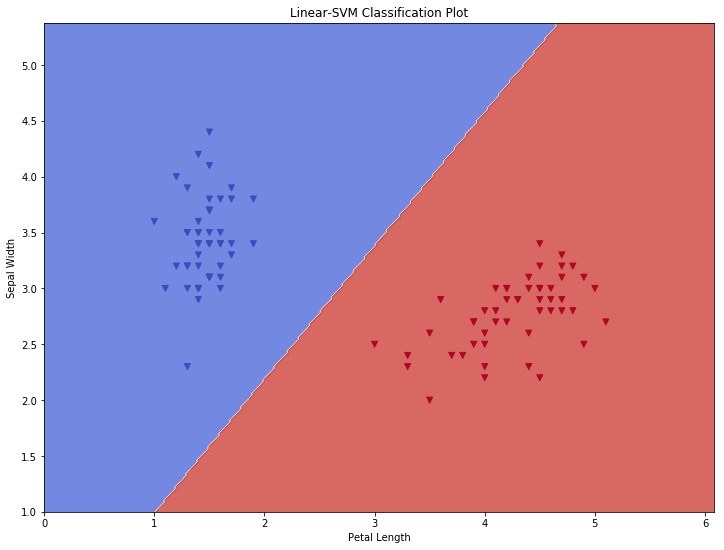

In [1]:
from sklearn import datasets
from pandas import Series, DataFrame
from sklearn.svm import LinearSVC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

iris = datasets.load_iris()
irisX = iris['data']
irisy = iris.target
SL = irisX[:,0] #Sepal length
SW = irisX[:,1] #Sepal width
PL = irisX[:,2] #Petal Length
PW = irisX[:,3] #Petal Width
y = irisy #Class

d = {'Petal.Length':PL[:100], 'Sepal.Width':SW[:100]}
df = DataFrame(data = d) 
df.head()

fit_Linear = LinearSVC(C = 1e-02)
fit_Linear.fit(df,y[:100])

# create a mesh to plot in
x_min, x_max = PL[:100].min() - 1, PL[:100].max() + 1
y_min, y_max = SW[:100].min() - 1, SW[:100].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = fit_Linear.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
fig = plt.gcf()
fig.set_size_inches(12,9)

plt.scatter(PL[:100], SW[:100], marker = 'v', c=y[:100], cmap=plt.cm.coolwarm)
plt.xlabel('Petal Length')
plt.ylabel('Sepal Width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Linear-SVM Classification Plot")

plt.show()

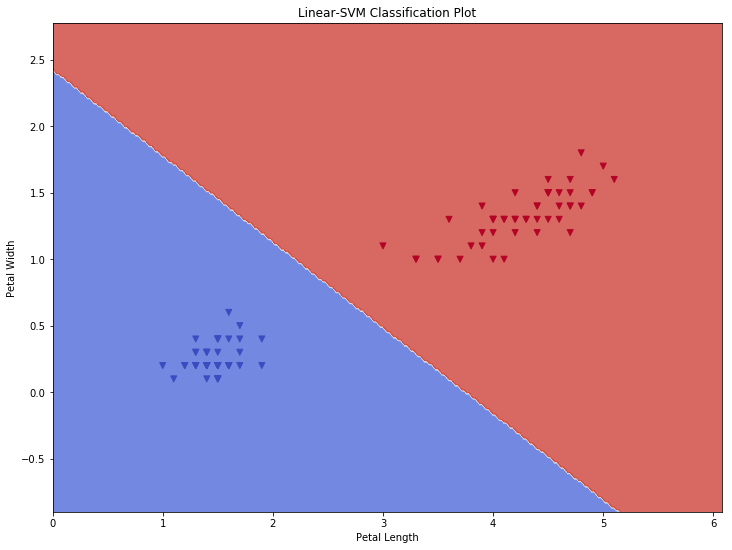

In [2]:

d2 = {'Petal_Length':PL[:100],"Petal_Width":PW[:100]}
df2 = DataFrame(data = d2)
fit_Linear2 = LinearSVC(C = 1e-01)
fit_Linear2.fit(df2,y[:100])



# Put the result into a color plot
x_min, x_max = PL[:100].min() - 1, PL[:100].max() + 1
y_min, y_max = PW[:100].min() - 1, PW[:100].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = fit_Linear2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
fig = plt.gcf()
fig.set_size_inches(12,9)

plt.scatter(PL[:100], PW[:100], marker = 'v', c=y[:100], cmap=plt.cm.coolwarm)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Linear-SVM Classification Plot")

plt.show()

In [3]:
import os
csv_filename = "Mixture-Example-Data-Old.csv"
csv_file = os.path.join('./',csv_filename)
df = pd.read_csv(csv_file,encoding = 'utf-8')
df = df.rename(columns={'Unnamed: 0':'Index'})
df = df.drop(df.columns[0],axis = 1)
df.head()

,x1,x2,y
0,2.526093,0.321050,0.0
1,0.366954,0.031462,0.0
2,0.768219,0.717486,0.0
3,0.693436,0.777194,0.0
4,-0.019837,0.867254,0.0


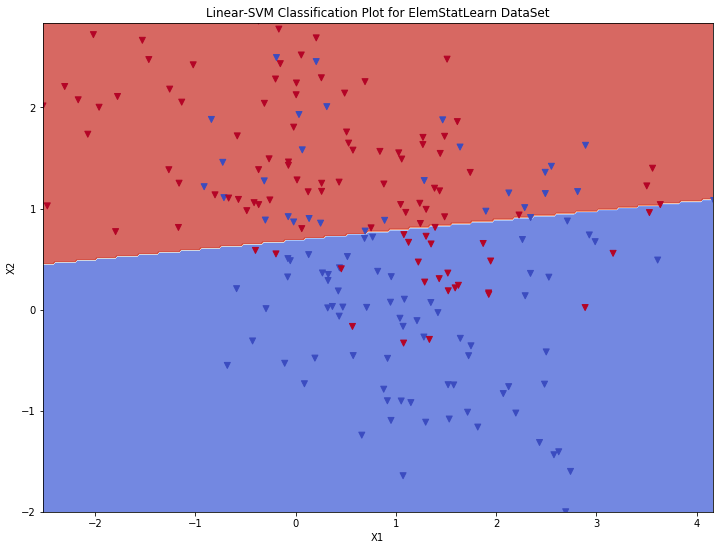

In [4]:
# Put the result into a color plot
x_min, x_max = min(df['x1']) , max(df['x1']) 
y_min, y_max = min(df['x2']) , max(df['x2']) 
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

fit_Linear3 = LinearSVC(C = 1)
fit_Linear3.fit(df.iloc[:,0:2],df.iloc[:,2])

Z = fit_Linear3.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
fig = plt.gcf()
fig.set_size_inches(12,9)

plt.scatter(df.iloc[:,0], df.iloc[:,1], marker = 'v', c=df.iloc[:,2], cmap=plt.cm.coolwarm)
plt.xlabel('X1')
plt.ylabel('X2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Linear-SVM Classification Plot for ElemStatLearn DataSet")

plt.show()

## Kernel Machines

In python, we use sklearn.svm.SVC method, which is implemented based on libsvm to do kernel svm prediction.

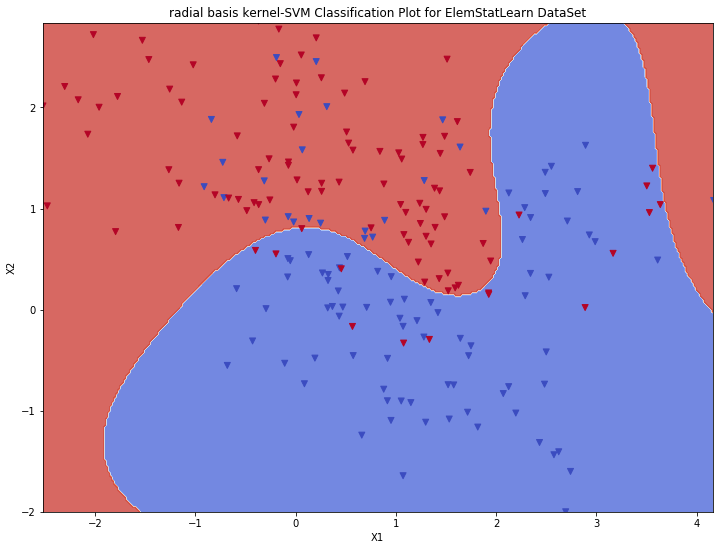

In [5]:
from sklearn.svm import SVC

fit_svm = SVC(C = 1, kernel = 'rbf')
fit_svm.fit(df.iloc[:,0:2],df.iloc[:,2])
Z = fit_svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
fig = plt.gcf()
fig.set_size_inches(12,9)

plt.scatter(df.iloc[:,0], df.iloc[:,1], marker = 'v', c=df.iloc[:,2], cmap=plt.cm.coolwarm)
plt.xlabel('X1')
plt.ylabel('X2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("radial basis kernel-SVM Classification Plot for ElemStatLearn DataSet")

plt.show()